<a href="https://colab.research.google.com/github/Isaquintero2004/Portafolio-Reto-Final-Analitica-de-Negocios/blob/main/RETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO FINAL - HEART ATTACK DATASET**
###**Integrantes**
* Maria José Agudelo
* Miguel Pimiento Restrepo
* Isabela Quintero Fernández

### **Descripción base de datos:**
Los conjuntos de datos de infarto se recopilaron en el hospital Zheen de Erbil (Irak) entre enero y mayo de 2019. Los atributos de este conjunto de datos son: edad, sexo, frecuencia cardíaca, presión arterial sistólica, presión arterial diastólica, glucemia, CK-MB y troponina, con valores negativos o positivos. Según la información proporcionada, el conjunto de datos médicos clasifica si se trata de un infarto o no. La columna de sexo está normalizada: para hombre se establece en 1 y para mujer en 0. La columna de glucosa se establece en 1 si es > 120; en caso contrario, en 0. En cuanto a los valores positivos, se establece en 1 y negativos en 0.

### **Descripción de las variables:**
* **Age:** La edad del paciente
* **Gender:** Sexo biológico del paciente (masculino/femenino)
* **Heart Rate:** El número de latidos por minuto.
* **Systolic Blood Pressure:** La presión en las arterias cuando el corazón se contrae.
* **Diastolic Blood Pressure:** La presión en las arterias entre latidos cardíacos.
* **Blood Sugar:** El nivel de glucosa en sangre del paciente.
* **CK-MB:** Enzima cardíaca liberada durante el daño del músculo cardíaco.
* **Troponin:** Un biomarcador proteico altamente específico para la lesión del músculo cardíaco.
* **Result:** La etiqueta de resultado que indica si el paciente sufrió o no un ataque cardíaco. *Será la variable de referencia*


Link para acceder al dataset en la plataforma Kaggle:
- https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid

0. Se cargan las librerias de trabajo

In [ ]:
#Librerias para todos los modelos
import numpy as np #para datos númericos, raíces y demás
import pandas as pd #comunicación con el excel
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt #graficador
import seaborn as sns

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Para los árboles de decisión: implementación y evaluación del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #exportar archivo
from pydotplus import graph_from_dot_data #Crear el gráfico

#Para KMeans
from sklearn.cluster import KMeans #Método de clusterización - kMeans
from sklearn.metrics import confusion_matrix #análisis del modelo

#Cargar base de datos
from google.colab import drive
drive.mount('/content/drive') #cargar la base de datos desde Drive


Mounted at /content/drive


1. Se procede con la carga de la base de datos

In [ ]:
#Cargamos la base de datos
nxl="/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS/Heart Attack Medical Dataset.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0) #usamos la hoja donde está toda la información
XDB.head(100)  #solo muestra 100 datos

#Se cargan las variables de interés
XDB=XDB[["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin", "Result"]]
XDB.dropna() #borramos las filas vacías

#Seleccionamos las variables
XD=XDB[["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin"]] #Variables de entrada
yd=XDB[["Result"]] #Variable de salida o referencia
XDB

#Caracterización de la base de datos
#Total de personas
total_personas = len(XDB)
print("Total de personas:", total_personas)

#Número de personas con ataque al corazón (Result = 1)
positivo = XDB["Result"].sum()
print("Número de personas que sufrieron un infarto:", positivo)

#Número de personas sin ataque al corazón (Result = 0)
negativo = total_personas - positivo
print("Número de personas que no sufrieron un infarto:", negativo)

Total de personas: 1319
Número de personas que sufrieron un infarto: 810
Número de personas que no sufrieron un infarto: 509


## **NAIVE BAYES**
2. Implementamos modelo Naive Bayes

In [ ]:
#Llamar al modelo Naive Bayes
mnb=GaussianNB()
mnb.fit(XD,yd)

#Se obtiene la información
ct=mnb.class_count_
print("Como están separados los datos: \n", ct)
print("El total de los datos es: \n", len(XD))
print("Los datos porcentualmente están divididos en: \n", ct/len(XD))
print(" ") #Espacio (para estética)

#Se obtiene la información de los infartos por categoría
#Media
u=mnb.theta_
print("La media de los infartos por categoría es: \n", u)
print(" ") #Espacio (para estética)

#Desviación estándar
std=mnb.var_  #Varianza es el valor elevado a la 2, para std hay que sacarle esa raíz
std=np.sqrt(std)  #Desviación estándar
print("La desviación estándar de los infartos por categoría es: \n", std)
print(" ") #Espacio (para estética)

#Valores superiores e inferiores de las categorias
print("El limite superior de los valores: \n", u+std)
print(" ") #Espacio (para estética)
print("El limite inferior de los valores: \n", u-std)
print(" ") #Espacio (para estética)

#Pronosticar
#Para evaluar un solo paciente
XS=[[64, 1, 66, 160, 83, 160, 1.8, 0.012]]
XS = pd.DataFrame(XS, columns=["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin"])
mnb.predict(XS)
print("La predicción para el infarto según los datos es: \n", mnb.predict(XS))

Como están separados los datos: 
 [509. 810.]
El total de los datos es: 
 1319
Los datos porcentualmente están divididos en: 
 [0.38589841 0.61410159]
 
La media de los infartos por categoría es: 
 [[5.20943026e+01 6.03143418e-01 7.78860511e+01 1.27856582e+02
  7.24400786e+01 1.49757760e+02 2.55534381e+00 2.69882122e-02]
 [5.87666667e+01 6.95061728e-01 7.86197531e+01 1.26739506e+02
  7.21617284e+01 1.44671605e+02 2.32668383e+01 5.70797531e-01]]
 
La desviación estándar de los infartos por categoría es: 
 [[13.71728839  0.48925151 48.16371462 27.01045906 14.31139964 78.33030442
   1.36620662  0.44289029]
 [12.94742     0.46038737 53.6616617  25.52316886 13.84686166 72.58386934
  57.66714365  1.38984717]]
 
El limite superior de los valores: 
 [[ 65.81159094   1.09239493 126.0497657  154.86704059  86.75147822
  228.08806474   3.92155043   0.4698785 ]
 [ 71.71408667   1.1554491  132.28141479 152.26267503  86.00859006
  217.25547428  80.93398192   1.96064471]]
 
El limite inferior de los v

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.1 Matriz de confusión Naive Bayes

In [ ]:
ydp=mnb.predict(XD) #Se obtiene la predicción de positivos y negativos

#Matriz de confusión
cm=confusion_matrix(yd, ydp)
print("La matriz de confusión es: \n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1] #Enumeramos donde se encuentra cada variable

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es: \n", Ex)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es: \n", TE)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Comportamiento de infartos positivos
print("La sensibilidad es: \n", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Comportamiento de infartos negativos
print("La especificidad es: \n", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Comportamiento de identificación de infartos
print("La precisión es: \n", Pre)

#Tasa de precisión negativa
pren=VN/(VN+FN) #Comportamiento de identificación de infartos negativos
print("La precisión negativa es: \n", pren)

La matriz de confusión es: 
 [[506   3]
 [426 384]]
La exactitud es: 
 0.6747536012130402
La tasa de error es: 
 0.3252463987869598
La sensibilidad es: 
 0.4740740740740741
La especificidad es: 
 0.9941060903732809
La precisión es: 
 0.9922480620155039
La precisión negativa es: 
 0.5429184549356223


## **ÁRBOLES DE DECISIÓN**
3. Implementamos modelo árboles de decisión

In [ ]:
#Se llama al árbol
np.random.seed(42)
mar=DecisionTreeClassifier(criterion="gini", max_depth=4)
mar.fit(XD, yd)

#Nombramos las variables
vs=["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin"] #Etiquetar el árbol (nombrarlo)

#Como quiero que me exporte el archivo
dot_data=export_graphviz(mar, feature_names=vs) #Exportarlo con los nombres
graph=graph_from_dot_data(dot_data) #Crear el gráfico
graph.write_png("ArbolHeartAttack.png")

True

3.1 Matriz de confusión árboles de decisión

In [ ]:
#Matriz de confusión
ydp=mar.predict(XD)
cm=confusion_matrix(yd, ydp)
print(cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es:", Ex)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Como se comportó el modelo con los positivos
print("La sensibilidad es:", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Como se comportó el modelo con los negativos
print("La especificidad es:", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Cual es el acierto clasificando los positivos
print("La precisión es:", Pre)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es:", TE)

#Tasa de precisión negativa
PredNeg=VN/(VN+FN) #Como funciona obteniendo los negativos
print("La precisión negativa es:", PredNeg)

[[506   3]
 [  3 807]]
La exactitud es: 0.9954510993176648
La sensibilidad es: 0.9962962962962963
La especificidad es: 0.9941060903732809
La precisión es: 0.9962962962962963
La tasa de error es: 0.004548900682335102
La precisión negativa es: 0.9941060903732809


## **CLUSTERIZACIÓN KMEANS**
4. Implementación del modelo KMeans

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


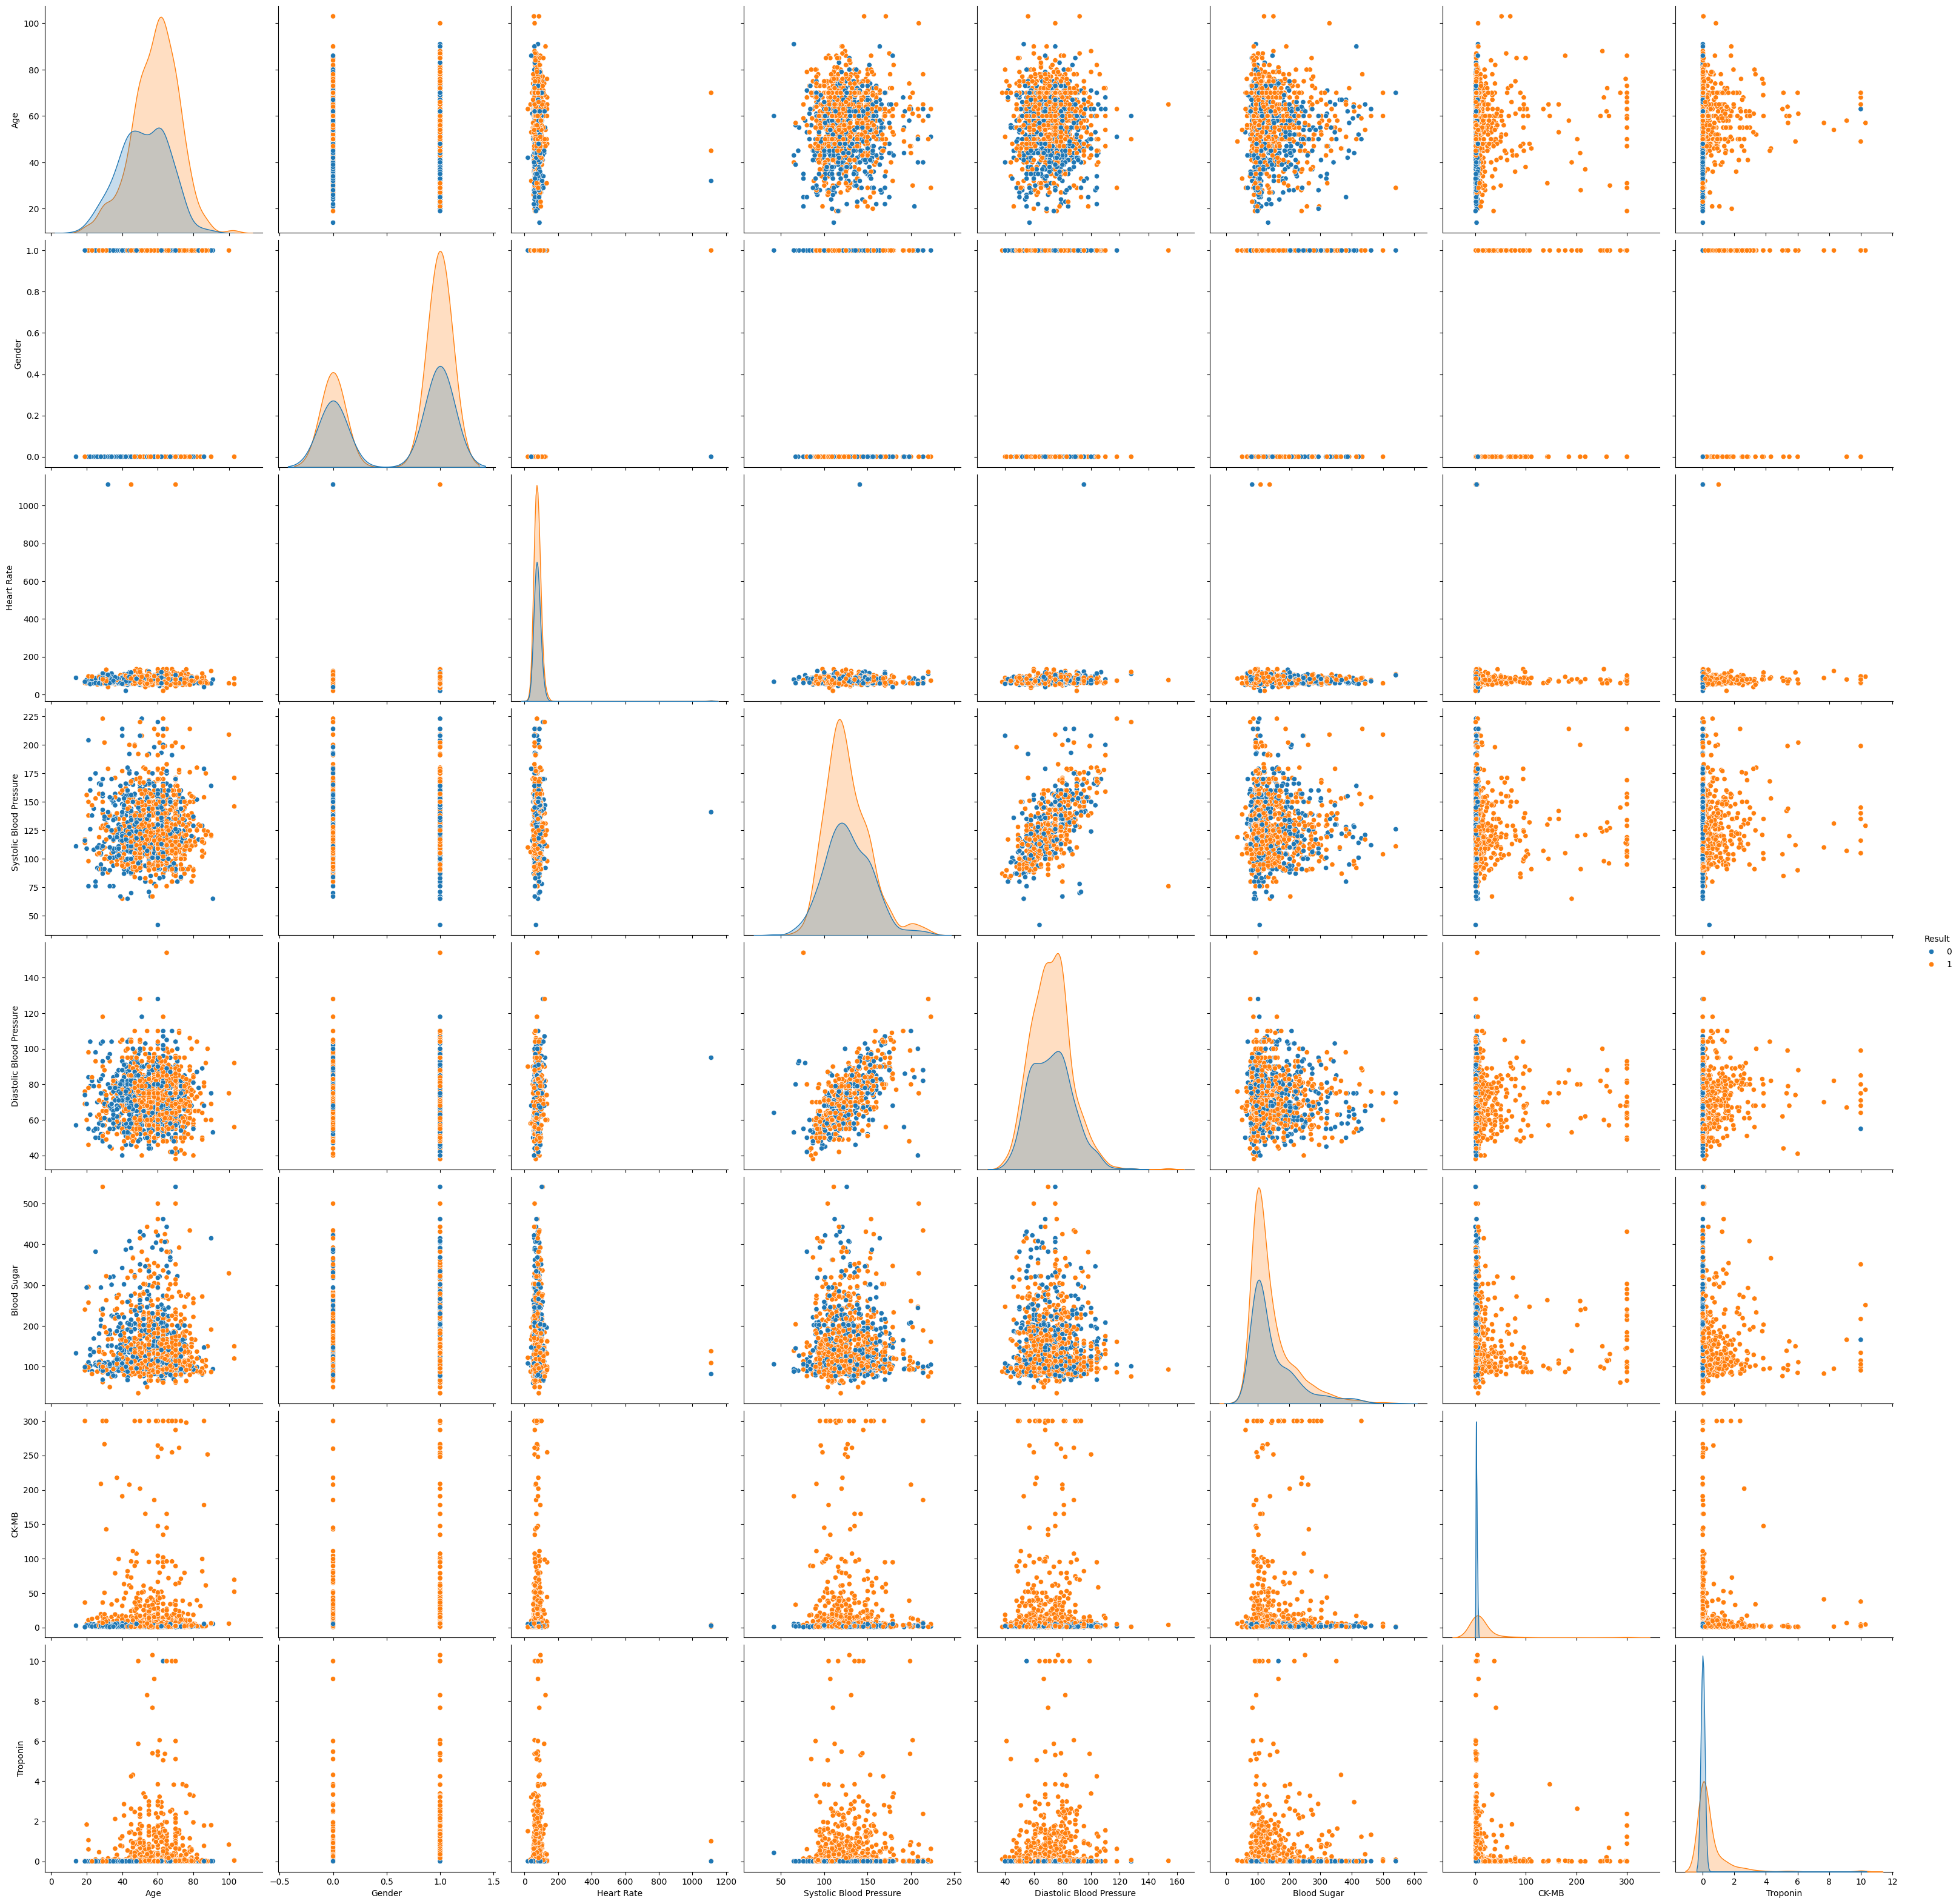

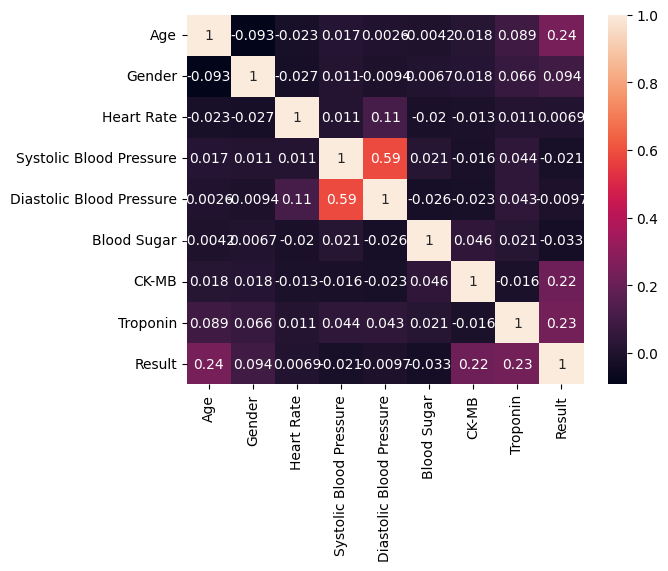

In [ ]:
#Construir los gráficos de correlación
sns.pairplot(XDB,hue="Result", size=4,vars=["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin"]) #Result es la variable que vamos a explicar

#Construir el heatmap
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()


4.1 Segunda parte de la implementación del modelo

,Age,Gender,Heart Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,CK-MB,Troponin
0,56.055556,0.656667,75.833333,126.583333,72.118889,107.340000,8.346838,0.337254
1,56.700000,0.700000,75.225000,126.600000,71.500000,170.225000,256.085000,0.352225
2,55.517647,0.682353,76.200000,128.670588,70.364706,357.964706,5.411647,0.405565
3,49.000000,0.333333,1111.000000,141.000000,95.000000,109.666667,2.620000,0.348667
4,56.814433,0.659794,76.484536,128.484536,73.161512,203.572852,6.609639,0.422495


Los cluster a los que pertenece una persona son: [4 2 4 ... 0 2 0]


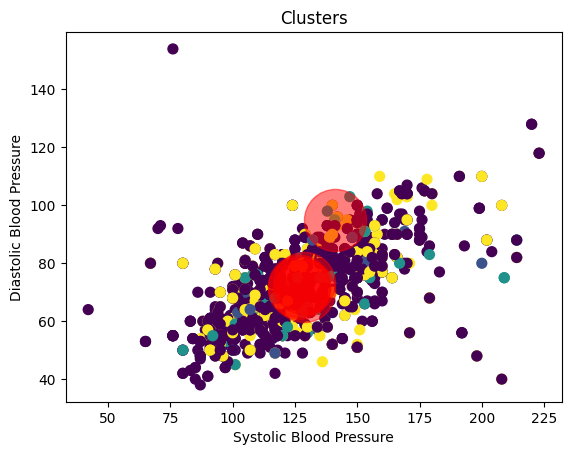

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Se le ponen 5 clusters, para poder describirlos muy bajo, bajo, medio, alto y mul alto- con los que se puede describir una variable
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(XD,yd)

#Para buscar los graficos creados
mkm.cluster_centers_ #Busca los centros del cluster

#Gráficos creados para los clusters
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=["Age", "Gender", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Sugar", "CK-MB", "Troponin"]
display(dfc)

#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(XD) #A cada cluster pertenece cada persona
print("Los cluster a los que pertenece una persona son:", ydc) #el número que aparece es al cluster al que pertenece

#Se procede con la gráfica de los cluster
#Tomamos las dos variables con mayor correlación
centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(XD.iloc[:,3],XD.iloc[:,4],c=ydc,s=50, cmap="viridis") #cmap es el color del mapay el s=50 es el tamaño de las bolitas
plt.scatter(centroids[:,3], centroids[:,4], c="red", s=2000, alpha=0.5) #ubica los clusters dentro del gráfico
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Diastolic Blood Pressure")
plt.title("Clusters")
plt.show()

4.2 Obtención de porcentajes de plan de salud por cluster

In [ ]:
#Contabilizar la cantidad de personas que tiene cada cluster
ND=np.bincount(ydc)

#Creamos la columna cluster para guardar el ydc
XDB["cluster"]=ydc #Adiciona una columna para indiciar a que cluster pertenece cada persona
display(XDB)

#Encontrar la cantidad de aprobados o no en cada cluster y su porcentaje
#Numero de personas aprobadas por cluster
Positivo=XDB.groupby("cluster").agg({"Result":lambda x: (x==1).sum()})

#Porcentajes aprobados
Positivop=np.array(Positivo)/ND[:,None]

#Numero de personas no aprobadas por cluster
Negativo=XDB.groupby("cluster").agg({"Result":lambda x: (x==0).sum()})

#Porcentaje negados
Negativop=np.array(Negativo)/ND[:,None]

#Organizarlo en una tabla todo junto
df2=pd.DataFrame(np.column_stack((ND, Positivo, Negativo, Positivop, Negativop)))
df2.columns=["ND", "Positivo", "Negativo", "%Positivo", "%Negativo"] #ND es el número total de personas por cluster
display(df2)

,Age,Gender,Heart Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,CK-MB,Troponin,Result,cluster
0,64,1,66,160,83,160.0,1.80,0.012,0,4
1,21,1,94,98,46,296.0,6.75,1.060,1,2
2,55,1,64,160,77,270.0,1.99,0.003,0,4
3,64,1,70,120,55,270.0,13.87,0.122,1,4
4,55,1,64,112,65,300.0,1.08,0.003,0,2
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0,4
1315,66,1,84,125,55,149.0,1.33,0.172,1,0
1316,45,1,85,168,104,96.0,1.24,4.250,1,0
1317,54,1,58,117,68,443.0,5.80,0.359,1,2


,ND,Positivo,Negativo,%Positivo,%Negativo
0,901.0,555.0,346.0,0.615982,0.384018
1,40.0,40.0,0.0,1.000000,0.000000
2,85.0,45.0,40.0,0.529412,0.470588
3,3.0,2.0,1.0,0.666667,0.333333
4,290.0,168.0,122.0,0.579310,0.420690


4.3 Pronóstico del modelo

In [ ]:
#Vector prnóstico, de igual longitud que ydc
ydp=np.zeros((len(ydc),1))

#Cluster al que pertenece cada persona
for k in range(len(ydp)):
  print("La persona:", k) #persona de la base de datos
  print("pertenece al cluster", ydc[k]) #a cual pertenece
  ncl=ydc[k] #almacenar el número de cluster
  print("El porcentaje de no sufrir infarto es:", Negativop[ncl]) #Busca porcentaje de personas que no sufrieron un infarto
  print("El porcentaje de sufrir infarto es:", Positivop[ncl]) #Busca porcentaje de personas que sufrieron infarto

#Aprobar o negar
  if Positivop[ncl]>Negativop[ncl]:
    print("Sufrió un infarto")
    ydp[k]=1
  else:
    print("No sufrió un infarto")
    ydp[k]=0

#Guardar pronóstico en la tabla inicial
XDB["Pronóstico"]=ydp #Adiciono una columna a la tabla original
display(XDB)

#Crear un excel
XDB.to_excel("InformeHeartAttack.xlsx")

Se han truncado las últimas 5000 líneas del flujo de salida.
La persona: 319
pertenece al cluster 0
El porcentaje de no sufrir infarto es: [0.38401776]
El porcentaje de sufrir infarto es: [0.61598224]
Sufrió un infarto
La persona: 320
pertenece al cluster 0
El porcentaje de no sufrir infarto es: [0.38401776]
El porcentaje de sufrir infarto es: [0.61598224]
Sufrió un infarto
La persona: 321
pertenece al cluster 0
El porcentaje de no sufrir infarto es: [0.38401776]
El porcentaje de sufrir infarto es: [0.61598224]
Sufrió un infarto
La persona: 322
pertenece al cluster 0
El porcentaje de no sufrir infarto es: [0.38401776]
El porcentaje de sufrir infarto es: [0.61598224]
Sufrió un infarto
La persona: 323
pertenece al cluster 4
El porcentaje de no sufrir infarto es: [0.42068966]
El porcentaje de sufrir infarto es: [0.57931034]
Sufrió un infarto
La persona: 324
pertenece al cluster 0
El porcentaje de no sufrir infarto es: [0.38401776]
El porcentaje de sufrir infarto es: [0.61598224]
Sufrió un

,Age,Gender,Heart Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,CK-MB,Troponin,Result,cluster,Pronóstico
0,64,1,66,160,83,160.0,1.80,0.012,0,4,1.0
1,21,1,94,98,46,296.0,6.75,1.060,1,2,1.0
2,55,1,64,160,77,270.0,1.99,0.003,0,4,1.0
3,64,1,70,120,55,270.0,13.87,0.122,1,4,1.0
4,55,1,64,112,65,300.0,1.08,0.003,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0,4,1.0
1315,66,1,84,125,55,149.0,1.33,0.172,1,0,1.0
1316,45,1,85,168,104,96.0,1.24,4.250,1,0,1.0
1317,54,1,58,117,68,443.0,5.80,0.359,1,2,1.0


4.4 Desempeño del modelo

In [ ]:
#Matriz de confusión
cm=confusion_matrix(yd, ydp) #ydp de pronóstico
print(cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es:", Ex)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Como se comportó el modelo con los positivos
print("La sensibilidad es:", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Como se comportó el modelo con los negativos
print("La especificidad es:", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Cual es el acierto clasificando los positivos
print("La precisión es:", Pre)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es:", TE)

#Tasa de precisión negativa
PredNeg=VN/(VN+FN) #Como funciona los negativos
print("La precisión negativa es:", PredNeg)

[[  0 509]
 [  0 810]]
La exactitud es: 0.6141015921152388
La sensibilidad es: 1.0
La especificidad es: 0.0
La precisión es: 0.6141015921152388
La tasa de error es: 0.3858984078847612
La precisión negativa es: nan


<ipython-input-11-f48e531d2d87>:28: RuntimeWarning: invalid value encountered in scalar divide
  PredNeg=VN/(VN+FN) #Como funciona los negativos


# **ANÁLISIS DE RESULTADOS**

### **Naive Bayes:**

Esta base de datos tiene un total de 1319 datos y 9 columnas. La variable Result fue tomada como variable de referencia o variable de salida, debido a que indica si el paciente experimentó o no un ataque cardíaco. El número total en la base de datos es de 1319, de los cuales 509 pertenecen a personas que no tuvieron un ataque cardiaco y 810 que si lo tuvieron.

509 de las personas analizadas no tuvieron un ataque cardiaco, mientras que 810 de estas personas si lo tuvieron. Las personas que no tuvieron un ataque representan el 38,6%% del total de datos ataques cardiacos, mientras que los que si lo tuvieron representan el 61,4%.

De acuerdo con los resultados arrojados por el modelo Naive Bayes, se puede observar que este alcanzó una exactitud, o desempeño general muy cercano al 70%, indicando un buen comportamiento del modelo frente a la especificidad del modelo para medir el comportamiento del mismo identificando si una persona tiene un ataque cardiaco o no, aunque podría ser mejor, ya que se busca que este alcance se acerque lo mayor posible a 75%. Adicionalmente, este modelo alcanzó una predicción negativa de tan solo 54%, indicando un funcionamiento del modelo bajo reconociendo personas que no experimentaron ataques cardiacos.

El modelo presenta una tasa de error de 33%, mostrando que el modelo se equivocó poco. Cabe aclarar que la precisión del modelo es 99%, lo que quiere decir que el modelo se comportó excelente en la predicción de los valores positivos, es decir las personas que presentaron ataques cardiacos. La sensibilidad fue del 47% mostrando un comportamiento positivo aunque muy bajo al indicar aquellos que presentaron ataques cardiacos.

Adicionalmente, la especificidad del modelo es también del 99% mostrando un excelente comportamiento del modelo identificando las personas que no presentaron ataques cardiacos.

De las 1319 personas analizadas, aquellas que si presentaron un ataque cardiaco, 384 fueron calculados correctamente, mientras que 426 fueron falsos negativos, es decir personas que se identificaron como personas que no tuvieron ataques cardiacos pero en realidad si lo tuvieron, como se puede observar, un gran número. Además, de las 1319 personas que no tuvieron un ataque cardiaco 506 fueron verdaderos negativos, es decir que se pronosticaron correctamente, y 3 fueron falsos positivos que no se pudieron indicar con exactitud, es decir donde el modelo se equivocó, como se puede observar un número muy bajo.

Al evaluar con este modelo a una persona con una edad de 64 años, de género masculino, con Heart Rate de 66, Systolic Blood Pressure de 160, Diastolic Blood Pressure de 83, Blood Sugar de 160, CK-MB de 1.8 y Troponin de 0.012, esta persona no tendría un ataque cardiaco.

A continuación se analizan los resultados de la media, la desviación estándar, el límite superior e inferior para las 4 variables clave relacionadas con ataques cardíacos:

Para el caso de Systolic Blood Preassure (Presión arterial sistólica), la presión en las arterias cuando el corazón se contrae, para las personas que no tuvieron un ataque cardiaco, la media fue de 1.278, mientras que para aquellos que si tuvieron ataque cardiaco, la media de la presión arterial sistólica fue de 1.267, indicando que ambos grupos (con y sin ataque) tienen presiones sistólicas similares (~127). En el caso de la desviación estándar, es decir la dispersión de los datos, para aquellas personas que no tuvieron ataques cardiacos, esta dispersión fue de 27.01, mientras que para aquellas personas que si lo tuvieron, fue de 25.52, mostrando que existe una variabilidad mayor en los valores de las personas que no tuvieron ataques cardiacos, aunque no muy diferente.

En cuanto al límite superior, el valor máximo de Presión arterial sistólica para quienes no tuvieron un ataque cardiaco fue de 154.867, y para quienes si lo tuvieron 152.26, indicando los umbrales máximos para considerar hipertensión severa. Por otro lado, para el límite inferior, para aquellas personas que no tuvieron un ataque cardiaco su presión arterial sistólica llegó a un mínimo de 100.846, y para las personas que si presentaron un ataque cardiaco a un mínimo de 101.216, indicando el valor mínimo esperado dentro del rango normal de cada caso.

Para el caso de Diastolic Blood Preassure (Presión arterial diastólica), la presión en las arterias entre los latidos del corazón (valor más bajo en la lectura de presión arterial, la media o centro de la distribución de los datos, que se presenta para ambos tipos de pacientes, es muy similar, ambos grupos tienen presiones diastólicas muy similares (~72). Para la desviación estándar, o dispersión de los datos alrededor de la media, en el caso de los pacientes que no tuvieron ataques cardiacos, esta dispersión es de 14.3, mientras que para las personas que si tuvieron un ataque cardiaco de 13.847, es decir, se presenta una ligera mayor dispersión en el grupo de no ataque. El límite superior de las personas que no tuvieron un ataque cardiaco fue de 86.75, y para aquellos que si lo tuvieron fue de 86.01. Para el caso del límite inferior de personas que no tuvieron ataque cardiaco valores por debajo de 58.129 podrían implicar hipertensión (baja presión), mientras que para las personas que si lo presentaron fue muy similar al grupo sin ataque, 58.315.

Para el caso de la CK-MB (Creatinina Quinasa-MB), una enzima cardíaca liberada durante el daño del músculo cardíaco, la media de ambos grupos mostraron que esta no varió en mayor medida entre los grupos de si ataque (2.327) y no ataque (2.55). Para el caso de la desviación estándar, el grupo de sí ataque muestra una desviación mucho mayor (57.667) que la del grupo de no ataque (1.366), sugiriendo una enorme dispersión por posibles valores atípicos o errores en los datos.

Para aquellos que no presentaron ataque cardiaco, su límite superior es de 3.92, y su límite inferior es de 1.189. Por otro lado, para los que si presentaron un ataque cardiaco, su límite superior de CK-MB es de 80.93, valores muy altos que son **típicos en infartos**, y su límite inferior de -34.4, que muestra un valor negativo que no puede tener esa naturaleza, pudiendo existir errores en datos o cálculo.

Finalmente, para el Troponin, un biomarcador de proteínas altamente específico para daño cardiaco, la media de Troponin de aquellas personas que no presentaron un ataque cardiaco es de 2.699, y para aquellas que si lo presentaron 5.71, coincidiendo con la troponina elevada en infartos. En cuanto a la desviación estándar, para aquellas personas que no tuvieron ataques cardiacos fue de 0.443, y para aquellos que si de 1.3898, una mayor dispersión para este último reflejando variabilidad en la gravedad del daño cardiaco. Los límites del grupo de personas de no ataque no son coherentes, ya que la troponina no puede ser negativa, en este caso -0.416 sugiriendo posibles errores en los datos. Para el caso de las personas de sí ataque, el límite superior (1.961) está dentro de lo esperado para pacientes con infarto.


### **Árbol de Decisión:**

El modelo de Árbol de Decisión implementado en este análisis presenta un desempeño sobresaliente tanto en términos estadísticos como clínicos. Con una exactitud del 99.54% (0.9954), el modelo demuestra una capacidad casi perfecta para clasificar correctamente a los pacientes según la presencia o ausencia de un ataque cardíaco. Este valor está significativamente por encima del umbral mínimo del 75%, lo cual confirma su calidad como herramienta predictiva. La tasa de error es extremadamente baja, de apenas 0.45% (0.0045), lo que representa solo seis errores de clasificación en un total de 1319 pacientes evaluados. Específicamente, el modelo incurrió en tres falsos negativos y tres falsos positivos. Esta precisión es especialmente importante en un contexto médico, ya que un falso negativo (predecir que un paciente no ha sufrido un infarto cuando sí lo ha tenido) puede derivar en una falta de tratamiento oportuno, mientras que un falso positivo puede generar alarmas injustificadas y uso innecesario de recursos clínicos.

El valor de sensibilidad obtenido fue de 99.63% (0.9963), lo que indica que el modelo es sumamente eficaz para detectar correctamente los casos reales de ataque cardíaco. Por su parte, la especificidad fue de 99.41% (0.9941), lo que significa que también es muy preciso para identificar correctamente a los pacientes que no presentan el evento cardíaco. Este equilibrio entre sensibilidad y especificidad es clave para reducir al máximo tanto los falsos negativos como los falsos positivos, ofreciendo un rendimiento ideal en contextos clínicos donde las decisiones deben ser certeras.

Además, el modelo construyó un árbol de decisión clínicamente coherente. Entre las variables utilizadas para la clasificación se encuentran biomarcadores ampliamente reconocidos por la comunidad médica, como los niveles de troponina, CK-MB y la presión arterial sistólica. La troponina, que aparece como el nodo raíz del árbol, es una proteína liberada en la sangre cuando hay daño en el músculo cardíaco, siendo uno de los indicadores más confiables para diagnosticar infartos. Le sigue CK-MB, una enzima asociada al tejido miocárdico, y luego la presión sistólica, que en niveles extremadamente bajos puede reflejar una condición de riesgo. La estructura del árbol, por tanto, no solo optimiza la predicción desde un punto de vista estadístico, sino que también replica decisiones similares a las que tomaría un médico especialista en emergencias o cardiología. Finalmente, los nodos terminales del árbol presentan un índice de Gini igual a 0.0 en 8 casos, lo cual significa que los registros en esos grupos están completamente puros, es decir, todos pertenecen a una sola clase. Esto confirma que el modelo logró separaciones nítidas y efectivas entre las diferentes categorías de pacientes. Basicamente, el modelo de Árbol de Decisión no solo muestra una altísima precisión numérica, sino también una interpretación lógica y coherente con la práctica médica, lo que refuerza su aplicabilidad como herramienta de apoyo en la toma de decisiones clínicas.


### **Clusterización:**

Para el modelo de clusterización KMeans, podemos evidenciar como la matriz de confusión presentada [[0, 509], [0, 810]] revela que el modelo clasificó todos los datos como pertenecientes a la **clase positiva**. Específicamente, no se predijo correctamente ningún caso negativo (0 verdaderos negativos), mientras que se clasificaron erróneamente 509 casos negativos como positivos (falsos positivos). En contraste, todos los casos positivos fueron correctamente identificados, con 810 verdaderos positivos y 0 falsos negativos.

Gracias a lo anterior, pudimos obtener una **sensibilidad** perfecta en un 100% (1.0), lo que indica que el modelo identificó correctamente todos los casos positivos, como pudimos evidenciar en la matriz con 0 casos falsos negativos, lo que demuestra el excelente comportamiento del modelo al predecir aquellos pacientes que sufrieron de un infarto. Sin embargo, su funcionalidad se pone en duda con la **especificidad** (capacidad del modelo para identificar correctamente los negativos) del 0% (0.0), evidenciando que el modelo no acertó en ninguno de estos casos. Este comportamiento puede deberse a que los datos están altamente desbalanceados, con una mayor proporción de ejemplos positivos frente a negativos (810 personas sufrieron un infarto según la base de datos, y 509 no), lo que lleva al modelo a inclinarse por predecir siempre la clase mayoritaria.

La **precisión** alcanza un valor mayor al 60% (0.614), lo que significa que el 61.4% de los casos predichos como positivos realmente lo eran, lo cual refuerza el cumplimiento del modelo frente al reconocimiento de los pacientes que sufrieron de un infarto. Este valor coincide con la **exactitud** general, también presentando un valor mayor al 60% (0.614), ya que todos los aciertos provienen de los verdaderos positivos. Por otro lado, la **tasa de error** es menor al 40% (0.385), lo que refleja un número considerable de predicciones incorrectas. Finalizando con la **precisión negativa** que para este modelo no puede calcularse (es nan) porque no se predijo ningún caso como negativo.

La evaluación anterior se confirma al predecir los resultados de todos los pacientes: el modelo clasificó a la totalidad de los encuestados como positivos (es decir, como personas que sufrieron un infarto), lo que refuerza su especificidad del 0% y evidencia su completa incapacidad para identificar casos negativos.

Por otro lado, el modelo identificó las variables con mayor **correlación** entre sí. En este caso, las variables **“Systolic Blood Pressure”** y **“Diastolic Blood Pressure”** mostraron el valor más alto, con una correlación del 59%, superando ampliamente al resto de las variables, cuyas correlaciones no superaron el 30%. En cuanto a la relación con la variable explicativa, **“Result”**, la mayor correlación la presentó la variable “Age”, con un 24%, lo que sugiere que la edad es el factor más relevante entre los pacientes evaluados para predecir el riesgo de ataques al corazón.

Así mismo, se tomaron un total de 5 **clusters** en relación con las variables clínicas evaluadas. El cluster 2 es el que presentó mayores niveles de glucosa en sangre (blood sugar de 357.96) y una edad promedio relativamente alta (55.5 años), lo que sugiere un posible grupo de pacientes con mayor riesgo clínico de ataques al corazón. Por otro lado, el cluster 3 mostró un comportamiento atípico, con un ritmo cardíaco extremadamente elevado (heart rate de 1111) y valores de presión arterial significativamente más altos con systolic blood pressure de 141 y diastolic blood pressure de 95, los mayores para sus categorías.

En cuanto a los demás grupos, el cluster 1 presentó los valores más altos de CK-MB (256.08), lo cual podría estar relacionado con un grupo de pacientes que ya ha presentado eventos cardíacos. Mientras tanto, el cluster 0 mostró valores más moderados en la mayoría de las variables, lo que sugiere un perfil clínico más estable.

En cuanto a la **distribución** de resultados según los clústers, se debe resaltar el comportamiento del cluster 1 que contiene solo 40 personas, pero todos ellos obtuvieron un 100% de resultados positivos, lo que lo convierte en el grupo con mayor concentración de casos críticos o con diagnóstico confirmado de ataques al corazón. Mientras que el cluster 2, con 85 individuos, muestra una distribución casi equilibrada: un 52.9% positivo y 47% negativo, lo cual sugiere un grupo mixto, posiblemente con factores de riesgo moderados donde el diagnóstico aún puede variar dependiendo de otras variables clínicas no consideradas en esta base de datos.

Finalmente, el modelo de clusterización KMeans para la base de datos Heart Attack Dataset evidencia que, aunque el modelo logró una sensibilidad excelente del 100% al identificar todos los casos positivos, falló completamente en reconocer los negativos (especificidad del 0%), debido al desbalance de clases. La edad resultó ser la variable con mayor correlación con respecto al riesgo de infarto. Además, los 5 clusters identificados muestran perfiles clínicos diversos, destacándose el cluster 1 con un 100% de positivos, y el cluster 2 con altos niveles de glucosa y edad, lo que indica riesgos elevados. Estos resultados subrayan tanto el potencial como las limitaciones del modelo en contextos clínicos.


#**Conclusiones Generales**
A continuación, presentamos una conclusión comparativa de los tres modelos evaluados, destacando para cada uno sus puntos más relevantes y su capacidad para predecir sobre la base de datos analizada:

* **Naive Bayes:** Con una base de 1319 pacientes, Naive Bayes logró una exactitud cercana al 70 % y una precisión del 99 %, pero presentó una muy baja sensibilidad (47%) y predicción negativa (54%). Esto indica que, aunque acierta casi siempre cuando predice un infarto, falla al detectar casi la mitad de los verdaderos casos y confunde a muchos pacientes sanos, lo cuál es un riesgo en términos médicos, pues se busca detectar de manera segura, clara y rápida posibles ataques al corazón, en ese proceso no puede existir la incertidumbre que este modelo está proporcionando, poniendo en duda su efectividad.

* **Árbol de Decisión:** Este modelo alcanzó una exactitud del 99,5%, con sensibilidad de 99,6 % y especificidad de 99,4 %, cometiendo solo seis errores (tres falsos positivos y tres falsos negativos). Su estructura incluyendo troponina, CK-MB y presión sistólica en los primeros nodos, refleja criterios clínicos reales y ofrece separación perfecta (Gini = 0) en la mayoría de las hojas.

* **Clusterización KMeans:** El enfoque no supervisado mostró 100% de sensibilidad y 0 % de especificidad, es decir, predijo todos los pacientes como “infarto”, debido al desbalance (810 vs. 509). Aunque reveló cinco perfiles o cluster clínicos importantes (por ejemplo, un cluster con glucosa alta y edad elevada), su capacidad al momento de predecir es limitada dado el desbalance que nula la correcta clasificación de los pacientes.

Finalmente, el modelo de **Árboles de Decisión** demuestra ser la opción más adecuada para el Heart Attack Dataset por varias razones. Primero, su exactitud casi perfecta (>99 %) refleja una capacidad excelente de clasificación, apoyada en su sensibilidad (99,6 %) y especificidad (99,4 %), lo que garantiza que detecte la inmensa mayoría de infartos reales sin generar falsas alarmas innecesarias. Además, su estructura de “if–then” facilita una interpretación clínica directa, permitiendo a los médicos validar y ajustar cada criterio (troponina, CK-MB, presión sistólica, etc.) según guías médicas. Estos resultados no solo aumentan la confianza en el modelo, sino que también simplifica su implementación en sistemas de hospitales y su mantenimiento ante nuevos datos, cumpliendo el objetivo principal de esta base de datos. En conclusión, estas características lo convierten en la herramienta más **fiable, práctica y segura** para apoyar diagnósticos de infarto en este contexto.


## **VIDEO**
En este link podrás acceder al video explicativo sobre los modelos utilizados en este cuaderno:

* https://youtu.be/0RS0z-D0ofk